# Split Data into Train and Test Sets

This Notebook roughly corresponds to Introduction to Text Analytics With R [part 1](https://www.youtube.com/watch?v=4vuw0AsHeGw&list=PLTJTBoU5HOCR5Vkah2Z-AU76ZYsZjGFK6&index=1) and [part 2.](https://www.youtube.com/watch?v=Y7385dGRNLM&list=PLTJTBoU5HOCR5Vkah2Z-AU76ZYsZjGFK6&index=2)

---

## Preliminary EDA

In [1]:
import os
import time
import numpy as np
import pandas as pd 

# load raw dataset
raw_path = os.path.join("..","data","1_raw")
filename = "spam.csv"
filepath = os.path.join(raw_path, filename)

raw = pd.read_csv(filepath, encoding="UTF-16", usecols=[0,1])
raw.columns = ["Label", "Text"]

In [2]:
raw.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Check for missing values

In [3]:
raw.isna().sum()

Label    0
Text     0
dtype: int64

### Check target distribution

In [4]:
df = raw.groupby("Label").count() / raw.count()
df["Text"]

Label
ham     0.865937
spam    0.134063
Name: Text, dtype: float64

This means we can expect a **base rate of $86.6\%$ accuracy** if we, say, just predicted ham for all SMS messages. In other words, we need to do better than 86.6% accuracy because that's just like getting 50% accuracy in balanced cases.

### Create a text length feature

In [5]:
raw["TextLen"] = [len(text) for text in raw["Text"]]

In [6]:
raw.head()

,Label,Text,TextLen
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
# examine stats
raw.describe()

,TextLen
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [8]:
# separate into subsets for plotting
spam = raw[raw.Label == "spam"]
ham = raw[raw.Label == "ham"]

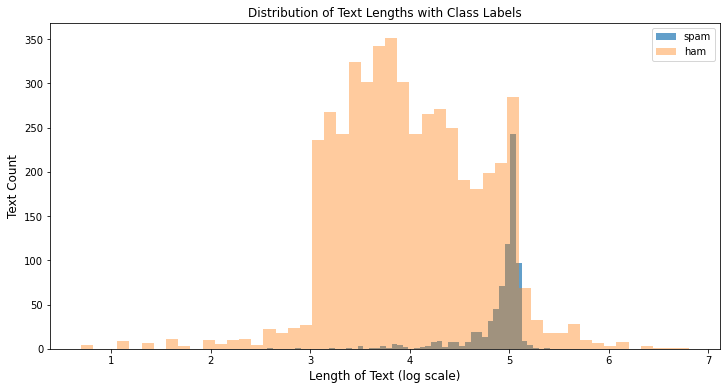

In [9]:
# visualize
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(12,6))    
plt.hist(np.log(spam["TextLen"]), bins=50, alpha=0.7, label="spam")
plt.hist(np.log(ham["TextLen"]), bins=50, alpha=0.4, label="ham")
plt.title("Distribution of Text Lengths with Class Labels")
plt.xlabel("Length of Text (log scale)", size=12)
plt.ylabel("Text Count", size=12)
plt.legend(loc='upper right')
plt.show()

### Split X, y

Here I just split my data into a feature matrix X and its target vector y.

In [10]:
X = raw.iloc[:, 1:2]
y = raw.iloc[:, 0:1]

---

## Split into Trainining & Test Sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32984)

In [12]:
X_train.head()

,Text
1537,All sounds good. Fingers . Makes it difficult ...
2263,Not heard from U4 a while. Call 4 rude chat pr...
3038,"Wishing you and your family Merry \X\"" mas and..."
2757,Yo we are watching a movie on netflix
1559,Single line with a big meaning::::: \Miss anyt...


In [13]:
y_train.head()

,Label
1537,ham
2263,spam
3038,ham
2757,ham
1559,ham


In [14]:
# Check target distributions after split
train = pd.merge(X_train, y_train, left_index=True, right_index=True)
test = pd.merge(X_test, y_test, left_index=True, right_index=True)

df1 = train.groupby("Label").count() / train.count()
df2 = test.groupby("Label").count() / test.count()

print(df1["Text"], df2["Text"])

Label
ham     0.867436
spam    0.132564
Name: Text, dtype: float64 Label
ham     0.86244
spam    0.13756
Name: Text, dtype: float64


Note new base rate for the training test: 86.74%.

In [15]:
# Save train and test sets
X_train.to_csv(os.path.join(raw_path, "X_train.csv"), index=False) 
X_test.to_csv(os.path.join(raw_path, "X_test.csv"), index=False)
y_train.to_csv(os.path.join(raw_path, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(raw_path, "y_test.csv"), index=False)

---